### Stationary and non-stationary data

Stationarity is a concept related to the behavior of time series data over time. Suppose that some people are talking and you are listening to them. Naturally, the words that they use change over time, but imagine that their manner also changes over time; they start talking slowly, continue very fast, and slow down again but speak loudly. It is difficult to understand their way of speaking and predict what comes next. It would have been easier to follow them if they had kept the same manner of speaking. In time series analysis, the data is non-stationary if it shows different behavior over time. In the following, we use the stock prices of a large bank to visualize such behavior.

#### Non-stationarity in time series data

Below we visually inspect the evolution of the prices over time and discuss why the prices are non-stationary. Let’s load the data.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# load data
data = pd.read_csv("c2_financial_data.csv", index_col="Date")
data.index = pd.to_datetime(data.index, format="%d.%m.%y")

prices = data["Close"]

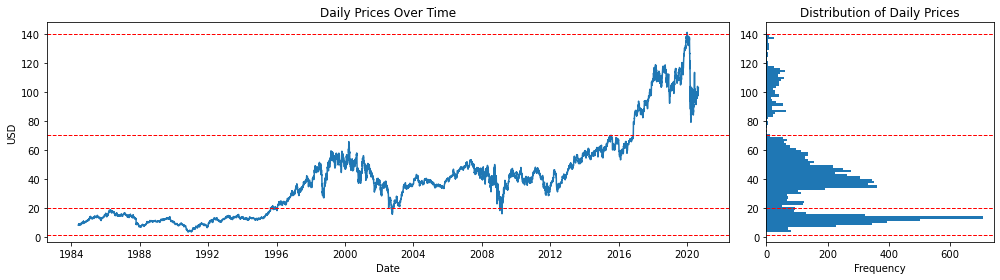

In [3]:
# Let’s plot the prices over time and also plot the histogram for prices

# Plot the trend and histogram of prices together
# initialize two subplots in 1 row and 2 columns. Also specify the size and width of each plot
fig, ax = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={"width_ratios": [3, 1]})

# create the first plot for the prices over time
ax[0].plot(prices)
ax[0].set_title("Daily Prices Over Time")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("USD")

# let's draw the horizontal red lines at some pre-set values
for i in [1, 20, 70, 140]:
    ax[0].axhline(i, color="r", linewidth=1, linestyle="--")

# create the histogram of prices in the second plot
ax[1].hist(prices, bins=90, orientation="horizontal")
ax[1].set_title("Distribution of Daily Prices")
ax[1].set_xlabel("Frequency")

# draw again the horizontal lines
for i in [1, 20, 70, 140]:
    ax[1].axhline(i, color="r", linewidth=1, linestyle="--")

fig.tight_layout()
plt.show()

The plot on the left shows the level of the prices, whereas the plot on the right shows the distribution of prices. This is an example of non-stationary data. Firstly, the price has an increasing trend over the whole period, i.e., the price level is not the same over time. Secondly, we note that from 1984 to 1996, the price varies between about 1 to 20 dollars. This range is about 20 to 70 dollars from 1996 to 2016 and 70 to 140 dollars from 2016 to 2020. In short, the level and variance of the prices change over time. Sometimes they move very smoothly, and in other times they are very volatile. This behavior is also evident in the histogram on the right. It shows that the shares of the bank are traded at prices in three different ranges. Statistically speaking, the distribution of the prices changes over time and therefore, the price data are non-stationary.

For some models the predictions based on stationary data are more reliable than on non-stationary data. Therefore, it is necessary to check the behavior of data before starting to build a model. Visual inspection, as described in this unit, is an easy way to check for this. Still, one can always use statistical tests to investigate the hypothesis that a data set is stationary or not.

What we observed about our price data is often true for prices of other stocks. However, we should note that other time series data may show different behavior than that of stock prices. In the following, we show plots of four synthetic time series data over 100 time steps and discuss if they are stationary.

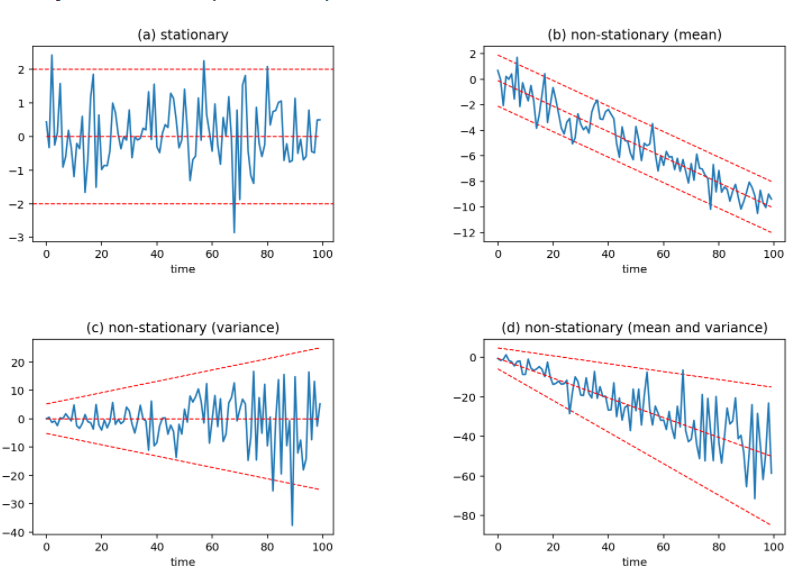

In [4]:
from IPython.display import Image
Image(filename="stationarity.png")

The values in plot (a) swing around zero all the time. Their up and downs also are always within a certain boundary. This may indicate that the data is stationary. However, in plot (b), although the up and downs also are always within a certain boundary, the level around which the values swing is not flat. Therefore, the data may not be stationary due to the downward trend. The level of the data in plot (c) is the same as in plot (a). It is flat at zero. However, the variance is expanding over time, and therefore the data may not be stationary due to the non-constant variance. Finally, the data in plot (d) may not be stationary due to the non-flat level and non-constant variance.